# **Model Tuning and Visualization**

**Author**: Mohammed A. Shehab
---
## **Overview**
This script focuses on tuning and evaluating three popular machine learning models:
1. **Support Vector Machine (SVM)**
2. **Decision Tree (DT)**
3. **Random Forest (RF)**

The models are tuned using different hyperparameters, and their performance is evaluated based on the **F1 score** for both training and testing datasets. Visualizations are provided to compare the performance of each model across different hyperparameter values.

---

## **Key Features**

### **1. Support Vector Machine (SVM)**
- **Hyperparameters Tuned**:
  - `C` (Regularization parameter): Controls the trade-off between achieving a low training error and a low testing error.
  - `gamma` (Kernel coefficient): Defines how far the influence of a single training example reaches.
- **Evaluation**:
  - Training and testing F1 scores are computed for every combination of `C` and `gamma`.

### **2. Decision Tree (DT)**
- **Hyperparameter Tuned**:
  - `max_depth`: The maximum depth of the tree. Controls the complexity of the model to avoid overfitting or underfitting.
- **Evaluation**:
  - Training and testing F1 scores are computed for each `max_depth` value.

### **3. Random Forest (RF)**
- **Hyperparameter Tuned**:
  - `n_estimators`: The number of trees in the forest.
- **Evaluation**:
  - Training and testing F1 scores are computed for each `n_estimators` value.

---

## **Visualization**
- **SVM**:
  - A line plot showing F1 scores for each combination of `C` and `gamma`.
- **Decision Tree**:
  - A line plot displaying F1 scores for varying `max_depth` values.
- **Random Forest**:
  - A line plot showing F1 scores for varying numbers of trees (`n_estimators`).

Each plot includes:
- **Training F1 Score Curve**: Visualizing how well the model fits the training data.
- **Testing F1 Score Curve**: Visualizing how well the model generalizes to unseen data.

---

## **Best Model Selection**
The script identifies the best-performing model for each algorithm based on the **highest testing F1 score**:
- For **SVM**, it outputs the best `C` and `gamma` values along with the F1 score.
- For **Decision Tree**, it outputs the best `max_depth` and the corresponding F1 score.
- For **Random Forest**, it outputs the optimal number of trees (`n_estimators`) and the F1 score.

---

## **Usage**
- **Customization**:
  - Replace the dataset loading section with your specific dataset.
  - Adjust hyperparameter ranges (`C`, `gamma`, `max_depth`, `n_estimators`) to fit your needs.
- **Outputs**:
  - Three visualizations (SVM, DT, RF) for training and testing F1 scores.
  - A summary of the best hyperparameters for each model.

---

## **Applications**
This script is ideal for:
1. Understanding how model performance changes with hyperparameter tuning.
2. Selecting the best hyperparameters for SVM, Decision Tree, and Random Forest.
3. Visualizing overfitting and underfitting trends in machine learning models.

---

## **Expected Results**
- **Plots**: Clear visualizations of training and testing F1 scores across hyperparameter values.
- **Summary**: A concise report of the optimal hyperparameters for each model with their respective F1 scores.

---

Let me know if you need additional details or modifications to this overview!


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification


In [4]:
# Generate synthetic dataset
X, y = make_classification(
    n_samples=1000, n_features=20, n_classes=2, 
    weights=[0.9, 0.1], random_state=42
)

## **Note**: here we used stratify parameter to keep ratio of imbalanced data same between train and test data

In [16]:
# Split the dataset into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [17]:
from collections import Counter
# Get class distributions
train_counts = Counter(y_train)
test_counts = Counter(y_test)
print("Training set class distribution:", Counter(train_counts))
print("Testing set class distribution:", Counter(test_counts))

Training set class distribution: Counter({0: 628, 1: 72})
Testing set class distribution: Counter({0: 269, 1: 31})


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Shehab\AppData\Local\Temp\ipykernel_28636\2299282393.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(train_counts.keys()), y=list(train_counts.values()), palette="viridis")
C:\Users\Shehab\AppData\Local\Temp\ipykernel_28636\2299282393.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(test_counts.keys()), y=list(test_counts.values()), palette="viridis")


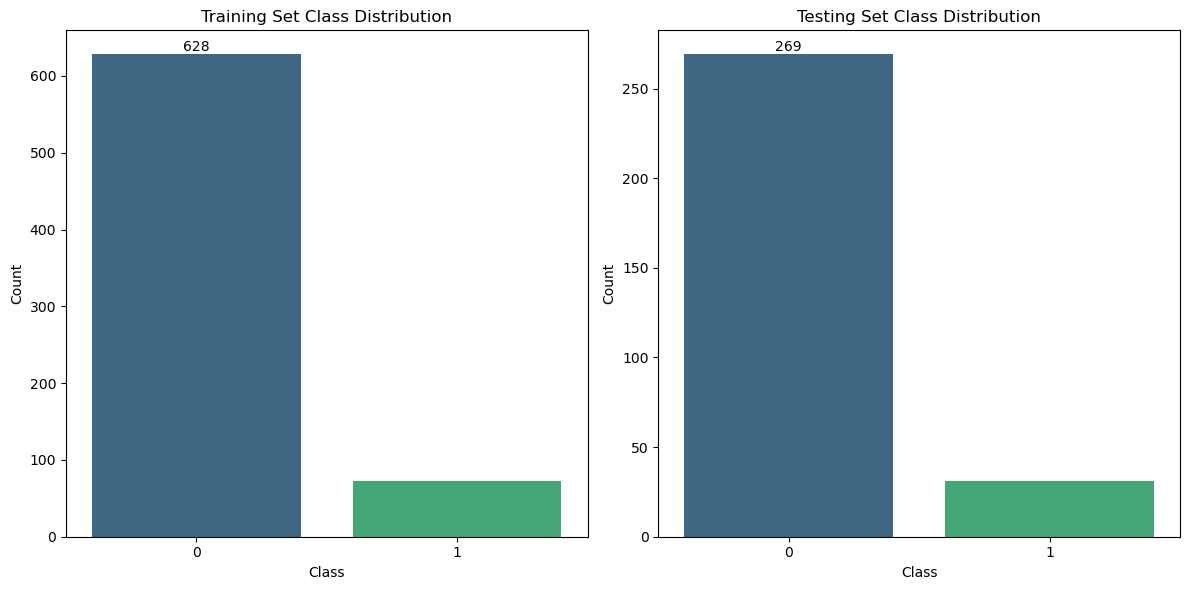

In [19]:
# Plot class distribution for training set
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=list(train_counts.keys()), y=list(train_counts.values()), palette="viridis")
plt.title("Training Set Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.bar_label(plt.gca().containers[0])  # Add count labels to the bars

# Plot class distribution for testing set
plt.subplot(1, 2, 2)
sns.barplot(x=list(test_counts.keys()), y=list(test_counts.values()), palette="viridis")
plt.title("Testing Set Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.bar_label(plt.gca().containers[0])  # Add count labels to the bars

plt.tight_layout()
plt.show()

In [20]:
# Dictionaries to store results
results = {
    "SVM": {"train_scores": [], "test_scores": [], "params": []},
    "DT": {"train_scores": [], "test_scores": [], "params": []},
    "RF": {"train_scores": [], "test_scores": [], "params": []},
}


# ---- Tuning SVM ----

In [21]:
svm_C_range = np.logspace(-3, 3, 10)  # C values from 0.001 to 1000
svm_gamma_range = np.logspace(-3, 2, 5)  # Gamma values from 0.001 to 100
for C in svm_C_range:
    for gamma in svm_gamma_range:
        model = SVC(C=C, gamma=gamma, kernel='rbf', probability=True, random_state=42)
        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        train_f1 = f1_score(y_train, y_train_pred)
        test_f1 = f1_score(y_test, y_test_pred)
        results["SVM"]["train_scores"].append(train_f1)
        results["SVM"]["test_scores"].append(test_f1)
        results["SVM"]["params"].append((C, gamma))

# ---- Tuning Decision Tree ----

In [22]:
dt_max_depth_range = range(1, 21)  # Max depth values
for max_depth in dt_max_depth_range:
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    train_f1 = f1_score(y_train, y_train_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    results["DT"]["train_scores"].append(train_f1)
    results["DT"]["test_scores"].append(test_f1)
    results["DT"]["params"].append(max_depth)

# ---- Tuning Random Forest ----

In [23]:
rf_n_estimators_range = range(10, 201, 20)  # Number of trees
for n_estimators in rf_n_estimators_range:
    model = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    train_f1 = f1_score(y_train, y_train_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    results["RF"]["train_scores"].append(train_f1)
    results["RF"]["test_scores"].append(test_f1)
    results["RF"]["params"].append(n_estimators)

## Visualization
---

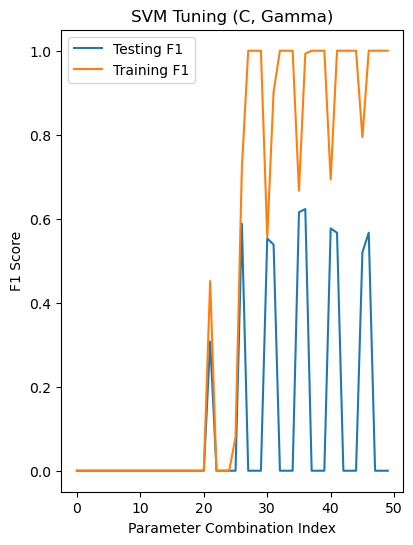

In [24]:
# Plot SVM Results
plt.figure(figsize=(15, 6))
plt.subplot(1, 3, 1)
plt.plot(range(len(results["SVM"]["test_scores"])), results["SVM"]["test_scores"], label="Testing F1")
plt.plot(range(len(results["SVM"]["train_scores"])), results["SVM"]["train_scores"], label="Training F1")
plt.title("SVM Tuning (C, Gamma)")
plt.xlabel("Parameter Combination Index")
plt.ylabel("F1 Score")
plt.legend()


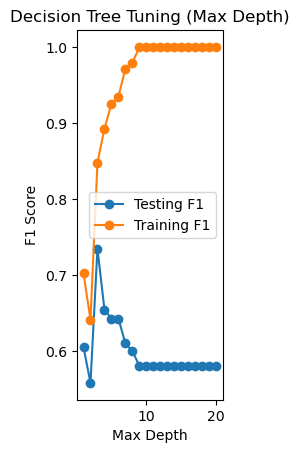

In [25]:
# Plot Decision Tree Results
plt.subplot(1, 3, 2)
plt.plot(dt_max_depth_range, results["DT"]["test_scores"], label="Testing F1", marker="o")
plt.plot(dt_max_depth_range, results["DT"]["train_scores"], label="Training F1", marker="o")
plt.title("Decision Tree Tuning (Max Depth)")
plt.xlabel("Max Depth")
plt.ylabel("F1 Score")
plt.legend()

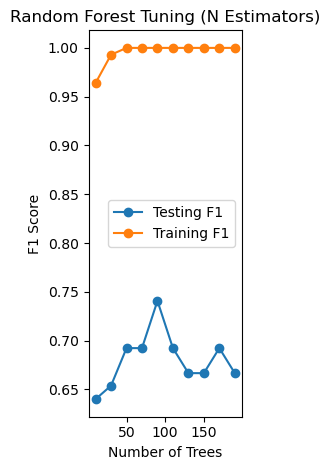

In [26]:
# Plot Random Forest Results
plt.subplot(1, 3, 3)
plt.plot(rf_n_estimators_range, results["RF"]["test_scores"], label="Testing F1", marker="o")
plt.plot(rf_n_estimators_range, results["RF"]["train_scores"], label="Training F1", marker="o")
plt.title("Random Forest Tuning (N Estimators)")
plt.xlabel("Number of Trees")
plt.ylabel("F1 Score")
plt.legend()

plt.tight_layout()
plt.show()

### Best Model Selection

In [27]:
# Find and display the best parameters for each model
best_svm_index = np.argmax(results["SVM"]["test_scores"])
best_dt_index = np.argmax(results["DT"]["test_scores"])
best_rf_index = np.argmax(results["RF"]["test_scores"])

print("Best SVM Parameters: C = {:.3f}, Gamma = {:.3f}, F1 = {:.2f}".format(
    results["SVM"]["params"][best_svm_index][0],
    results["SVM"]["params"][best_svm_index][1],
    results["SVM"]["test_scores"][best_svm_index]
))

print("Best Decision Tree Parameters: Max Depth = {}, F1 = {:.2f}".format(
    results["DT"]["params"][best_dt_index],
    results["DT"]["test_scores"][best_dt_index]
))

print("Best Random Forest Parameters: N Estimators = {}, F1 = {:.2f}".format(
    results["RF"]["params"][best_rf_index],
    results["RF"]["test_scores"][best_rf_index]
))

Best SVM Parameters: C = 46.416, Gamma = 0.018, F1 = 0.62
Best Decision Tree Parameters: Max Depth = 3, F1 = 0.73
Best Random Forest Parameters: N Estimators = 90, F1 = 0.74


# **Tasks for Students**

## **Objective**
Explore the impact of data balancing and evaluate model performance using the ROC curve.

---

## **Task 1: Balance the Data and Observe the Differences**
1. **Load the Data**:
   - Use the provided `X` and `y` dataset from `make_classification`.
   - Split the data into training and testing sets using `train_test_split` with `stratify=y`.

2. **Visualize Class Distribution**:
   - Plot the class distribution for the original training and testing datasets using bar plots.

3. **Balance the Training Data**:
   - Use oversampling techniques like **SMOTE** (Synthetic Minority Oversampling Technique) to balance the dataset.
   - Alternatively, explore undersampling or a hybrid approach.

4. **Visualize the Balanced Data**:
   - Plot the class distribution after balancing to confirm the changes.

5. **Train Models on Balanced Data**:
   - Train any two models of your choice (e.g., SVM, Decision Tree, Random Forest) on the balanced dataset.

6. **Compare Performance**:
   - Compare the performance of models trained on the original imbalanced dataset and the balanced dataset.
   - Use metrics like F1 Score, Precision, and Recall to evaluate the impact of balancing.

---

## **Task 2: Draw the ROC Curve and Evaluate Model Performance**
1. **Train a Model**:
   - Use the SVM, Decision Tree, or Random Forest model on the **balanced dataset**.

2. **Generate Predictions**:
   - Use `predict_proba` (if available) or decision scores from the model to calculate probabilities for the positive class.

3. **Compute ROC Metrics**:
   - Use `roc_curve` to compute the False Positive Rate (FPR) and True Positive Rate (TPR).
   - Calculate the Area Under the Curve (AUC) using `roc_auc_score`.

4. **Plot the ROC Curve**:
   - Plot the ROC curve with the FPR on the x-axis and TPR on the y-axis.
   - Add a diagonal line (`y=x`) to represent a random classifier as a baseline.

5. **Analyze Model Performance**:
   - Compare the AUC scores of models trained on the balanced dataset.
   - Discuss how balancing the dataset impacts the ROC curve and AUC.

---

## **Deliverables**
- **Plots**:
  - Class distribution before and after balancing.
  - ROC curves for at least two models trained on the balanced dataset.

- **Analysis**:
  - Study observations on the impact of data balancing on model performance.
  - Study of how the ROC curve and AUC reflect the model's ability to distinguish between classes.

---

## **Optional Extension**
- Explore **different balancing techniques** (e.g., oversampling, undersampling, hybrid) and compare their impact on model performance.
- Train additional models and compare their ROC curves and AUC scores.
